# Group Project: Data-driven Business Manager with APIs

#### Number of points: 30 (weights 30% in the final grade)
#### Deadline to form the groups: October 18th at 12:30 pm CET
#### Deadline for the code submission: October 24th at 01:29 pm CET
#### Presentations on October 24th

## Objective
In this project, you will create a Business that utilizes various APIs to make informed decisions about running your local business. If you want to sell drinks or street food or whatever floats your boat, do not hesitate to find your data and design the project accordingly. You will collect data from meteorological and non-meteorological APIs to help your business determine when, where, and how much inventory is needed to maximize sales. 

## Grading

In total, the group project counts for 30% of the final grade and represents 30 points.

The points are distributed in two parts: the code and the presentation.

- Some items e.g. Statistics are represented in both parts and will require to compute them in the code **and** present them during the presentation.
- Please note that the data must come from an API. You need to use at least 3 APIs (weather + two others). You can also of course use data downloaded from the internet, however they cannot replace the API data.
- Additionally, emphasis will be put on the **Storytelling** and whether or not the choice of APIs, data processing, statistics and visualisations are relevant for your business.
- To make grading easier, please provide **clean code** with **relevant comments** to make it straightforward what you are doing.
- Everyone in the group project must present during presentation day. **A penalty of -2 points** will be applied to each person **who does not present a significant part** during the presentation.


| **Code** | **15 points** |
| --- | --- |
| A. Collect data from weather API | 3 points |
| B. Collect data from two other non-meteorological APIs | 4 points |
| C. Data cleaning and processing | 3 points |
| D. Compute relevant statistics | 2 points |
| E. Clean and clear visualisations  | 3 points |


| **Presentation** | **15 points** |
| --- | --- |
| 1. Description of unique business idea | 1 point |
| 2. Presentation of all the APIs used and how it serves your business | 3 points |
| 3. Presentation of the data cleaning and processing | 2 points |
| 4. Presentation of the statistics | 2 points |
| 5. Presentation of the visualisations and how they serve the business| 3 points |
| 6. Storytelling | 4 points |

**Penalty: -2 points to each person who does not present a significant part during the presentation.**


**Penalty for unexcused absence or lateness**: 
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Getting Ready
#### Recommended deadline: October 8th
#### Deadline: October 18th at 12:30 pm CET

1. Form your group and select a group name. Communicate your group name to the teacher along with the First Name and Last Name of all the team members.

2. Create a branch on the **Students** repository with your group name (exactly the same as the one communicated to the teacher).

3. Discuss with your group and answer the following questions:

   - What kind of business do we run? What do we sell ? The choice of the business must be original and unique to your group.
   - How do we name our business?
   - When do we operate? Is it an all-year-round business or a seasonal one? If so, which seasons? Which months / weeks / days / hours of the day do we operate?
   - Where do we operate? In which countries / cities are we currently active ? Where do we want to develop in the future ? Determine where to set up your business stand based on weather conditions, local attractions, or events. The location should maximize customer traffic and sales.

In [1]:
import requests
import pandas as pd
import http.client
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Code | A. Collect data from weather API | 3 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Use the OpenWeatherMap API to fetch weather data for your chosen location. You can select any city or location for your business.

- Fetch your chosen location's current temperature and weather conditions.
- Fetch the forecasted weather data for the next few days (e.g., five days).

In [3]:
#Location of Berlin
L = requests.get("http://api.openweathermap.org/geo/1.0/direct?q=Berlin&limit=5&appid=b658d4211c02ef5cc3ab87ad1c933843")
w= L.json()

#Berlin Current Weather
response = requests.get("https://api.openweathermap.org/data/2.5/weather?lat=52.5170365&lon=13.3888599&exclude=hourly&units=metric&appid=b658d4211c02ef5cc3ab87ad1c933843")
Q = response.json()
print(Q)

{'coord': {'lon': 13.3889, 'lat': 52.517}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 15.73, 'feels_like': 15.32, 'temp_min': 13.94, 'temp_max': 17.19, 'pressure': 1035, 'humidity': 75, 'sea_level': 1035, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 210, 'gust': 3.58}, 'clouds': {'all': 20}, 'dt': 1729683436, 'sys': {'type': 2, 'id': 2009543, 'country': 'DE', 'sunrise': 1729662395, 'sunset': 1729698875}, 'timezone': 7200, 'id': 7576815, 'name': 'Alt-Kölln', 'cod': 200}


In [5]:
import pandas as pd
berlin_weather_current = pd.DataFrame([Q])

berlin_weather_current_main = berlin_weather_current['main'].apply(pd.Series)

# You can also expand other nested fields similarly
berlin_weather_current_weather = berlin_weather_current['weather'].apply(lambda x: x[0]).apply(pd.Series)

# Concatenate the expanded DataFrames with the main DataFrame (dropping the original nested columns)
berlin_weather_current_final = pd.concat([berlin_weather_current, berlin_weather_current_main, berlin_weather_current_weather], axis=1).drop(['main', 'weather','base','wind','clouds','dt','sys','timezone','id','pressure','humidity','sea_level','grnd_level','icon','visibility','name','cod'], axis=1)

# Now df_final contains all the relevant data
berlin_weather_current_final.head()

,coord,temp,feels_like,temp_min,temp_max,description
0,"{'lon': 13.3889, 'lat': 52.517}",15.73,15.32,13.94,17.19,few clouds


### Forecast

In [49]:
#Forecast Weather
response1 = requests.get("https://api.openweathermap.org/data/2.5/forecast?lat=52.5170365&lon=13.3888599&exclude=hourly&units=metric&appid=b658d4211c02ef5cc3ab87ad1c933843")
Forecast = response1.json()# Parse the JSON response

# Extract the list of forecasts (usually under the 'list' key)
forecast_list = Forecast['list']

# Create a DataFrame from the forecast list
df = pd.DataFrame(forecast_list)

df_main = df['main'].apply(pd.Series)

# You can also expand other nested fields similarly
df_weather = df['weather'].apply(lambda x: x[0]).apply(pd.Series)

# Concatenate the expanded DataFrames with the main DataFrame (dropping the original nested columns)
df_final = pd.concat([df, df_main, df_weather], axis=1).drop(['main', 'weather','dt','clouds','visibility','wind','sys','pressure','sea_level','grnd_level','humidity','temp_kf','id','icon'], axis=1)

# Now df_final contains all the relevant data
print(df_final)


    pop               dt_txt   temp  feels_like  temp_min  temp_max  \
0     0  2024-10-23 15:00:00  15.65       15.07     14.84     15.65   
1     0  2024-10-23 18:00:00  13.83       13.12     12.72     13.83   
2     0  2024-10-23 21:00:00  11.29       10.49     11.29     11.29   
3     0  2024-10-24 00:00:00  10.19        9.43     10.19     10.19   
4     0  2024-10-24 03:00:00   9.17        8.34      9.17      9.17   
5     0  2024-10-24 06:00:00   8.46        7.15      8.46      8.46   
6     0  2024-10-24 09:00:00  12.11       11.10     12.11     12.11   
7     0  2024-10-24 12:00:00  15.85       14.74     15.85     15.85   
8     0  2024-10-24 15:00:00  15.49       14.37     15.49     15.49   
9     0  2024-10-24 18:00:00  12.90       11.79     12.90     12.90   
10    0  2024-10-24 21:00:00  11.52       10.45     11.52     11.52   
11    0  2024-10-25 00:00:00  11.27       10.33     11.27     11.27   
12    0  2024-10-25 03:00:00  10.72        9.96     10.72     10.72   
13    

## Code | B. Collect data from two other APIs | 4 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Integrate with **at least two** of the non-meteorological APIs you've learned about based on the location and the season.

It has to be with an API (not a downloaded dataset). 

You can of course use a downloaded dataset on top of the two APIs you've chosen.

You can also use more APIs, sky is the limit!

You can choose from:
- Google Maps,
- TripAdvisor,
- News API,
- Yelp,
- Wikipedia,
- Booking,
- Amadeus Travel API,
- Foursquare,
- etc. (make your own research and be original!)

Each API can provide different types of information. Pick the ones that best suit your application.


After collecting all the data you need, save them.

#### Orange juice API

In [5]:
private_api_key = "5af5038f2cmsh57e6cd35f4d7007p1f68cbjsn3f2122a2613b"

params = {
    "symbols": "ORANGEJUICE",  # Commodity 
    "base": "EUR"              # Currency
}

response = requests.get(
    "https://commodities-apised.p.rapidapi.com/v1/market-data",  
    params=params, 
    headers={
        "X-RapidAPI-Host": "commodities-apised.p.rapidapi.com",
        "X-RapidAPI-Key": private_api_key  
    }
)

json_data = response.json()

# Extract rates information
if json_data['success']:
    rates = json_data['rates']['ORANGEJUICE']

    # Convert the extracted data into a DataFrame
    df = pd.DataFrame([rates])

    print("The rates are in euros per pound of orange juice:")
    print(df)
else:
    print("Error: Could not retrieve data.")
    print(json_data['errors'])


The rates are in euros per pound of orange juice:
      open     high     low     prev  current
0  4.26335  4.37372  4.2358  4.26283  4.35844


#### Events Data

In [8]:
# Calculate date range for the next month
today = datetime.now().date()
next_month = today + timedelta(days=30)
today_str = today.strftime("%Y-%m-%d")
next_month_str = next_month.strftime("%Y-%m-%d")

# Get API Key
api_token = "a9kompRf5e_NPnPID6Hg9PeJBB9qwaZZTmMAJ0jO"

# Creating events formula for pagins
def get_events(api_token, start_date, end_date, max_results=1000):
    url = "https://api.predicthq.com/v1/events/"
    headers = {
        "Authorization": f"Bearer {api_token}",
        "Accept": "application/json"
    }
    params = {
        "categories": "community, festivals, sports",
        "saved_location.location_id": "N333B4M3T98yr-3FQ3nIHw",
        "phq_attendance.gte": "500", # Avoid minor events which would not be profitable for us
        "active.gte": start_date,
        "active.lte": end_date,
        "limit": 100  # Maximum allowed by the API
    }

    all_events = []
    while len(all_events) < max_results:
        response = requests.get(url, headers=headers, params=params)
        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            print(response.text)
            break

        data = response.json()
        events = data['results']
        all_events.extend(events)

        if not data['next']:
            break  # No more pages

        params['offset'] = data['next'].split('offset=')[1].split('&')[0]

    return all_events[:max_results]

In [9]:
# Get events into dataframe
events = get_events(api_token, today_str, next_month_str)
berlin_events = pd.DataFrame(events)

In [10]:
# Create table with relevant variables
events_summary = berlin_events[["title", "category", "labels", "phq_attendance", "predicted_event_spend", "start_local", "predicted_end_local", "location"]]

# Create new columns for start date and time
events_summary.loc[:, "start_date"] = events_summary["start_local"].str.split('T').str[0]
events_summary.loc[:, "start_time"] = events_summary["start_local"].str.split('T').str[1]
events_summary["start_date"] = pd.to_datetime(events_summary["start_date"])
events_summary["start_time"] = pd.to_datetime(events_summary["start_time"])

# Create new columns for end date and time + convert data type
events_summary.loc[:, "end_date"] = events_summary["predicted_end_local"].str.split('T').str[0]
events_summary.loc[:, "end_time"] = events_summary["predicted_end_local"].str.split('T').str[1]
events_summary["end_date"] = pd.to_datetime(events_summary["end_date"])
events_summary["end_time"] = pd.to_datetime(events_summary["end_time"])

events_summary

C:\Users\armel\AppData\Local\Temp\ipykernel_14356\2676833785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_summary.loc[:, "start_date"] = events_summary["start_local"].str.split('T').str[0]
C:\Users\armel\AppData\Local\Temp\ipykernel_14356\2676833785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_summary.loc[:, "start_time"] = events_summary["start_local"].str.split('T').str[1]
C:\Users\armel\AppData\Local\Temp\ipykernel_14356\2676833785.py:7: SettingWithCopyWarning: 
A value is try

,title,category,labels,phq_attendance,predicted_event_spend,start_local,predicted_end_local,location,start_date,start_time,end_date,end_time
0,"M.Rider, Molly Green, Eli Waltz, and June",concerts,"[concert, music]",523,16655,2024-11-21T20:00:00,2024-11-22T00:10:00,"[13.39144, 52.52514]",2024-11-21,2024-10-22 20:00:00,2024-11-22,2024-10-22 00:10:00
1,Lisa Eckhart,performing-arts,"[comedy, entertainment, performing-arts]",754,22638,2024-11-21T20:00:00,2024-11-21T21:50:00,"[13.3883474, 52.5207127]",2024-11-21,2024-10-22 20:00:00,2024-11-21,2024-10-22 21:50:00
2,Mord im Orientexpress,performing-arts,"[entertainment, performing-arts]",749,22488,2024-11-21T19:30:00,2024-11-21T21:20:00,"[13.372268, 52.50757]",2024-11-21,2024-10-22 19:30:00,2024-11-21,2024-10-22 21:20:00
3,Lean Development in Practice,conferences,[conference],500,62164,2024-11-21T09:00:00,NaN,"[13.4373, 52.5234]",2024-11-21,2024-10-22 09:00:00,NaT,NaT
4,WhoMadeWho,concerts,"[concert, music]",702,22356,2024-11-20T20:00:00,2024-11-21T02:40:00,"[13.381228, 52.50162599999999]",2024-11-20,2024-10-22 20:00:00,2024-11-21,2024-10-22 02:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...
79,Java Script Days,conferences,[conference],500,119580,2024-10-21T09:00:00,NaN,"[13.3882436, 52.5183247]",2024-10-21,2024-10-22 09:00:00,NaT,NaT
80,German Kita Management Congress,conferences,[conference],500,62164,2024-10-21T09:00:00,NaN,"[13.416334, 52.520431]",2024-10-21,2024-10-22 09:00:00,NaT,NaT
81,International Research Symposium on Agricultur...,conferences,[conference],500,90872,2024-10-21T09:00:00,NaN,"[13.3871292, 52.5087155]",2024-10-21,2024-10-22 09:00:00,NaT,NaT
82,API Conference,conferences,[conference],500,90872,2024-10-21T00:00:00,NaN,"[13.3882436, 52.5183247]",2024-10-21,2024-10-22 00:00:00,NaT,NaT


In [11]:
events_summary['start_date'] = pd.to_datetime(events_summary['start_date'], errors='coerce')
events_summary['date'] = events_summary['start_date'].dt.date  # Extract the date part
events_summary

C:\Users\armel\AppData\Local\Temp\ipykernel_14356\2712528716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_summary['start_date'] = pd.to_datetime(events_summary['start_date'], errors='coerce')
C:\Users\armel\AppData\Local\Temp\ipykernel_14356\2712528716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_summary['date'] = events_summary['start_date'].dt.date  # Extract the date part


,title,category,labels,phq_attendance,predicted_event_spend,start_local,predicted_end_local,location,start_date,start_time,end_date,end_time,date
0,"M.Rider, Molly Green, Eli Waltz, and June",concerts,"[concert, music]",523,16655,2024-11-21T20:00:00,2024-11-22T00:10:00,"[13.39144, 52.52514]",2024-11-21,2024-10-22 20:00:00,2024-11-22,2024-10-22 00:10:00,2024-11-21
1,Lisa Eckhart,performing-arts,"[comedy, entertainment, performing-arts]",754,22638,2024-11-21T20:00:00,2024-11-21T21:50:00,"[13.3883474, 52.5207127]",2024-11-21,2024-10-22 20:00:00,2024-11-21,2024-10-22 21:50:00,2024-11-21
2,Mord im Orientexpress,performing-arts,"[entertainment, performing-arts]",749,22488,2024-11-21T19:30:00,2024-11-21T21:20:00,"[13.372268, 52.50757]",2024-11-21,2024-10-22 19:30:00,2024-11-21,2024-10-22 21:20:00,2024-11-21
3,Lean Development in Practice,conferences,[conference],500,62164,2024-11-21T09:00:00,NaN,"[13.4373, 52.5234]",2024-11-21,2024-10-22 09:00:00,NaT,NaT,2024-11-21
4,WhoMadeWho,concerts,"[concert, music]",702,22356,2024-11-20T20:00:00,2024-11-21T02:40:00,"[13.381228, 52.50162599999999]",2024-11-20,2024-10-22 20:00:00,2024-11-21,2024-10-22 02:40:00,2024-11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Java Script Days,conferences,[conference],500,119580,2024-10-21T09:00:00,NaN,"[13.3882436, 52.5183247]",2024-10-21,2024-10-22 09:00:00,NaT,NaT,2024-10-21
80,German Kita Management Congress,conferences,[conference],500,62164,2024-10-21T09:00:00,NaN,"[13.416334, 52.520431]",2024-10-21,2024-10-22 09:00:00,NaT,NaT,2024-10-21
81,International Research Symposium on Agricultur...,conferences,[conference],500,90872,2024-10-21T09:00:00,NaN,"[13.3871292, 52.5087155]",2024-10-21,2024-10-22 09:00:00,NaT,NaT,2024-10-21
82,API Conference,conferences,[conference],500,90872,2024-10-21T00:00:00,NaN,"[13.3882436, 52.5183247]",2024-10-21,2024-10-22 00:00:00,NaT,NaT,2024-10-21


## Code | C. Data cleaning and processing | 3 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

### The average temp daily for the forecast

In [41]:
df_final['dt_txt'] = df_final['dt_txt'].astype(str)
df_final['dt_txt'] = pd.to_datetime(df_final['dt_txt'], errors='coerce')

df_final['date'] = df_final['dt_txt'].dt.date  # Extract the date part
print(df_final)

                                          wind  pop              dt_txt  \
0    {'speed': 1.43, 'deg': 282, 'gust': 2.05}    0 2024-10-23 15:00:00   
1    {'speed': 0.38, 'deg': 315, 'gust': 0.44}    0 2024-10-23 18:00:00   
2    {'speed': 0.99, 'deg': 119, 'gust': 0.95}    0 2024-10-23 21:00:00   
3    {'speed': 1.83, 'deg': 138, 'gust': 2.59}    0 2024-10-24 00:00:00   
4    {'speed': 1.87, 'deg': 122, 'gust': 3.49}    0 2024-10-24 03:00:00   
5     {'speed': 2.3, 'deg': 117, 'gust': 5.11}    0 2024-10-24 06:00:00   
6    {'speed': 3.35, 'deg': 115, 'gust': 5.79}    0 2024-10-24 09:00:00   
7    {'speed': 4.16, 'deg': 112, 'gust': 6.02}    0 2024-10-24 12:00:00   
8    {'speed': 3.98, 'deg': 112, 'gust': 7.77}    0 2024-10-24 15:00:00   
9   {'speed': 4.01, 'deg': 114, 'gust': 10.31}    0 2024-10-24 18:00:00   
10    {'speed': 3.6, 'deg': 114, 'gust': 9.39}    0 2024-10-24 21:00:00   
11  {'speed': 4.11, 'deg': 122, 'gust': 12.02}    0 2024-10-25 00:00:00   
12   {'speed': 3.61, 'deg

In [43]:
avg_temp_per_day = df_final.groupby('date')['feels_like'].mean().reset_index()

# Display the result

print(avg_temp_per_day)

         date  feels_like
0  2024-10-23   12.833333
1  2024-10-24   10.921250
2  2024-10-25   12.697500
3  2024-10-26   13.740000
4  2024-10-27   13.593750
5  2024-10-28   11.772000


In [59]:
df_final['dt_txt'] = pd.to_datetime(df['dt_txt'])

# Create new columns for noon and night temperature
df_final['date'] = df_final['dt_txt'].dt.date  # Extract the date part for grouping
df_final['time'] = df_final['dt_txt'].dt.time  # Extract the time part

# Define the time ranges for noon and night
noon_start = pd.to_datetime('09:00:00').time()
noon_end = pd.to_datetime('18:00:00').time()
night_start = pd.to_datetime('18:00:00').time()
night_end = pd.to_datetime('00:00:00').time()

# Filter for noon temperatures
noon_tem = df_final[(df_final['time'] >= noon_start) & (df_final['time'] <= noon_end)].groupby('date')['temp'].mean().reset_index()
noon_tem.rename(columns={'temp': 'noon_tem'}, inplace=True)

# Filter for night temperatures
night_tem = df_final[(df_final['time'] >= night_start) | (df_final['time'] < night_end)].groupby('date')['temp'].mean().reset_index()
night_tem.rename(columns={'temp': 'night_tem'}, inplace=True)

# Merge the two new DataFrames back into the original DataFrame
final_df = pd.merge(df_final[['date']].drop_duplicates(), noon_tem, on='date', how='left')
final_df = pd.merge(final_df, night_tem, on='date', how='left')

# Display the final DataFrame
print(final_df)

         date  noon_tem  night_tem
0  2024-10-23   14.7400     12.560
1  2024-10-24   14.0875     12.210
2  2024-10-25   15.7800     13.985
3  2024-10-26   16.2650     14.330
4  2024-10-27   16.2325     14.205
5  2024-10-28   13.7850        NaN


In [61]:
def determine_quality(temp):
    if pd.isna(temp):  # Handle NaN values
        return None
    elif temp < 10:
        return 0
    elif 10 <= temp < 15:
        return 0.4
    elif 15 <= temp < 20:
        return 0.7
    elif 20 <= temp < 25:
        return 0.85
    else:
        return 1

# Apply the function to both noon_tem and night_tem to create the quality column
final_df['quality_noon'] = final_df['noon_tem'].apply(determine_quality)
final_df['quality_night'] = final_df['night_tem'].apply(determine_quality)

# Display the updated DataFrame
print(final_df[['date', 'noon_tem', 'night_tem', 'quality_noon', 'quality_night']])

         date  noon_tem  night_tem  quality_noon  quality_night
0  2024-10-23   14.7400     12.560           0.4            0.4
1  2024-10-24   14.0875     12.210           0.4            0.4
2  2024-10-25   15.7800     13.985           0.7            0.4
3  2024-10-26   16.2650     14.330           0.7            0.4
4  2024-10-27   16.2325     14.205           0.7            0.4
5  2024-10-28   13.7850        NaN           0.4            NaN


### Weather and Event Dataframe

In [14]:
Weather_and_Event = events_summary.merge(avg_temp_per_day, how="inner", left_on= "date", right_on="date")
Weather_and_Event

,title,category,labels,phq_attendance,predicted_event_spend,start_local,predicted_end_local,location,start_date,start_time,end_date,end_time,date,temp
0,Matija,concerts,"[concert, music]",500,15923,2024-10-27T20:00:00,2024-10-28T00:10:00,"[13.4227942, 52.5131365]",2024-10-27,2024-10-22 20:00:00,2024-10-28,2024-10-22 00:10:00,2024-10-27,13.455714
1,Andrej Hermlin and his Swing Dance Orchestra -...,concerts,"[concert, music]",1525,48565,2024-10-27T16:00:00,2024-10-27T18:30:00,"[13.3883474, 52.5207127]",2024-10-27,2024-10-22 16:00:00,2024-10-27,2024-10-22 18:30:00,2024-10-27,13.455714
2,Das perfekte Geheimnis,performing-arts,"[entertainment, performing-arts]",749,22488,2024-10-27T16:00:00,2024-10-27T17:50:00,"[13.372268, 52.50757]",2024-10-27,2024-10-22 16:00:00,2024-10-27,2024-10-22 17:50:00,2024-10-27,13.455714
3,Plus Size Private Shopping,expos,"[expo, fashion]",1703,133099,2024-10-27T11:00:00,NaN,"[13.3987113, 52.511366]",2024-10-27,2024-10-22 11:00:00,NaT,NaT,2024-10-27,13.455714
4,Das perfekte Geheimnis,performing-arts,"[entertainment, performing-arts]",749,22488,2024-10-26T19:30:00,2024-10-26T21:20:00,"[13.372268, 52.50757]",2024-10-26,2024-10-22 19:30:00,2024-10-26,2024-10-22 21:20:00,2024-10-26,14.266250
5,Borsig Amp Fest,festivals,"[festival, music]",510,15312,2024-10-26T00:00:00,NaN,"[13.4137698383, 52.5393412479]",2024-10-26,2024-10-22 00:00:00,NaT,NaT,2024-10-26,14.266250
6,RaveCage w/ AMBAM,community,"[concert, music]",900,19579,2024-10-25T23:00:00,NaN,"[13.409103, 52.522664]",2024-10-25,2024-10-22 23:00:00,NaT,NaT,2024-10-25,14.090000
7,Nikki Nair,concerts,"[concert, music]",508,16177,2024-10-25T23:00:00,2024-10-26T05:40:00,"[13.4197619, 52.5106031]",2024-10-25,2024-10-22 23:00:00,2024-10-26,2024-10-22 05:40:00,2024-10-25,14.090000
8,Das perfekte Geheimnis,performing-arts,"[entertainment, performing-arts]",749,22488,2024-10-25T19:30:00,2024-10-25T21:20:00,"[13.372268, 52.50757]",2024-10-25,2024-10-22 19:30:00,2024-10-25,2024-10-22 21:20:00,2024-10-25,14.090000
9,An ORACLE for BERLIN # The JOURNEY,conferences,"[conference, outdoor]",536,36685,2024-10-24T19:30:00,NaN,"[13.4178277, 52.5338076]",2024-10-24,2024-10-22 19:30:00,NaT,NaT,2024-10-24,12.078750


## Code | D. Compute relevant statistics | 2 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

Get together as a group and ask yourselves: what business questions would you like to answer? For example:

- On which days are there maximum customer traffic?
- On which days do we expect to make more sales?
- How much inventory should we get? Why?
- Which impact would the weather conditions, local attractions or events have on your business?
- How would you like to develop the business in the future?
    - Do you wish to expand to new locations?
    - Launch a new product?
    - Target more elderly or young people?
    - Target vegetarian or book-worm people?

Compute descriptive statistics that inform you about the future of your business and enable you to answer the business questions.|


## Code | E. Clean and clear visualisations  | 3 points
#### Deadline: October 24th at 01:29 pm CET

Create **at least 3 data visualisations** that clearly state your point and support your decision-making. 


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

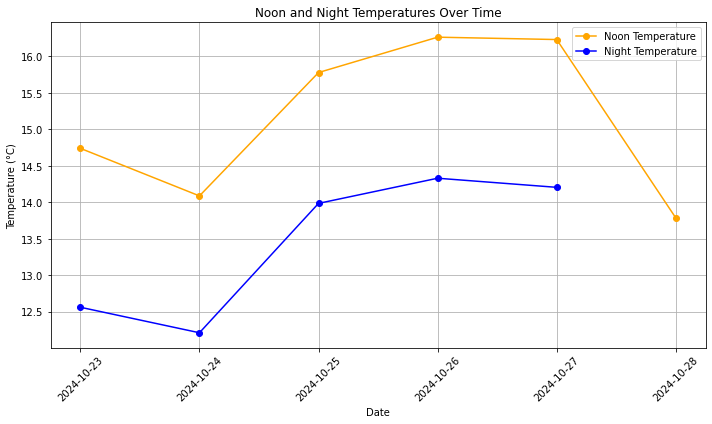

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['date'], final_df['noon_tem'], marker='o', label='Noon Temperature', color='orange')
plt.plot(final_df['date'], final_df['night_tem'], marker='o', label='Night Temperature', color='blue')

# Add titles and labels
plt.title('Noon and Night Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

## Presentation | 15 points
#### Deadline: October 24th during class

> Make a presentation about your business, the data you've collected and the direction you're taking the business in the next months.

**Presentation | 1. Description of unique business idea | 1 point**

Summarise the name and choice of business as well as location and the time of year it operates (you can add some branding, logo, etc.)


**Presentation | 2. Presentation of all the APIs used and how it serves your business | 3 points**

Present each API and explain why the collected data is relevant for your business.


**Presentation | 3. Presentation of the data cleaning and processing | 2 points**

Explain the steps your team took in order to get to a clean and structured dataset.


**Presentation | 4. Presentation of the statistics  & 5. Data visualisations | 5 points**

Display the statistics and relevant data visualisations that helped you make informed decisions about your business. The descriptive statistics and visualisations enable you to draw conclusions that take your business in one or the other direction. You need to explain how this information serves your business and the next steps you will take.

**Presentation | 6. Storytelling | 4 points**

Why did you pick this business idea? Why this name?

Who is your target audience? What problem does it solve?

What decisions did you make to make your business thrive in the future? What are your current challenges? Opportunities?

Can Data save your business or make it expand to new territories?


Create a good story!